In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV # Test train ayarlamak için.
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chisquare
from sklearn.impute import SimpleImputer

In [2]:
df1 = pd.read_csv("384e3505-6b1e-41d0-8c4b-e667c4136be7.csv")
df2 = pd.read_csv("e127b0e6-1825-49ee-9d09-ab8311978983.csv")

In [3]:
df1.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,IRL,1991-01-01,1991-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1991.0,1991.0,7021.0,Annual value,NaN,70.44,I
1,IRL,1992-01-01,1992-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1992.0,1992.0,7021.0,Annual value,NaN,67.01,I
2,IRL,1993-01-01,1993-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1993.0,1993.0,7021.0,Annual value,NaN,67.01,I
3,IRL,1994-01-01,1994-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994.0,7021.0,Annual value,NaN,56.54,I
4,IRL,1995-01-01,1995-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995.0,7021.0,Annual value,NaN,70.82,I


In [4]:
df2.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,SWE,1995-01-01,1995-12-31,210.0,'752,Sweden,515.0,'01341,Apples,5530.0,Producer Price (LCU/tonne),1995.0,1995.0,7021.0,Annual value,LCU,3938.0,A
1,SWE,1996-01-01,1996-12-31,210.0,'752,Sweden,515.0,'01341,Apples,5530.0,Producer Price (LCU/tonne),1996.0,1996.0,7021.0,Annual value,LCU,3914.0,A
2,SWE,1997-01-01,1997-12-31,210.0,'752,Sweden,515.0,'01341,Apples,5530.0,Producer Price (LCU/tonne),1997.0,1997.0,7021.0,Annual value,LCU,4353.0,A
3,SWE,2000-01-01,2000-12-31,210.0,'752,Sweden,515.0,'01341,Apples,5530.0,Producer Price (LCU/tonne),2000.0,2000.0,7021.0,Annual value,LCU,3538.0,A
4,SWE,2001-01-01,2001-12-31,210.0,'752,Sweden,515.0,'01341,Apples,5530.0,Producer Price (LCU/tonne),2001.0,2001.0,7021.0,Annual value,LCU,4136.0,A


In [5]:
df1["Item"].value_counts()

Mushrooms and truffles                                    121
Carrots and turnips                                       121
Cauliflowers and broccoli                                 121
Raw milk of cattle                                        121
Lettuce and chicory                                       121
Tomatoes                                                  121
Wheat                                                     115
Oats                                                      115
Barley                                                    100
Cabbages                                                   76
Sugar beet                                                 76
Strawberries                                               37
Apples                                                     31
Agriculture                                                31
Eggs Primary                                               31
Fruit Primary                                              31
Livestoc

In [6]:
df1["Year"].value_counts()

1991.0    66
1992.0    66
1993.0    63
1994.0    63
2002.0    60
2013.0    60
2012.0    60
2011.0    60
2010.0    60
2005.0    60
2004.0    60
2003.0    60
2001.0    60
2000.0    60
1999.0    60
1998.0    60
1997.0    60
1996.0    60
1995.0    60
2016.0    57
2020.0    57
2019.0    57
2018.0    57
2017.0    57
2006.0    57
2009.0    57
2008.0    57
2007.0    57
2015.0    51
2014.0    51
2021.0    30
Name: Year, dtype: int64

In [7]:
for col in df1.columns:
    print("################")
    print("################")
    print("################")
    print("Nunique Values")
    print(df1[col].nunique())
    print("################")
    print("################")
    print("################")
    print("Value Counts")
    print(df1[col].value_counts())
    print("################")
    print("################")
    print("################")

################
################
################
Nunique Values
1509
################
################
################
Value Counts
IRL                                                                                                                                                                                        1803
IRL,1992-01-01,1992-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),1992,1992,7021,Annual value,USD,245.000000,A       1
IRL,2020-01-01,2020-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),2020,2020,7021,Annual value,USD,319.800000,A       1
IRL,2019-01-01,2019-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),2019,2019,7021,Annual value,USD,419.800000,A       1
IRL,2018-01-01,2018-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding deh

In [8]:
df1.isnull().sum()

Iso3                  0
StartDate          1508
EndDate            1508
Area Code          1508
Area Code (M49)    1508
Area               1508
Item Code          1508
Item Code (CPC)    1508
Item               1508
Element Code       1508
Element            1508
Year Code          1508
Year               1508
Months Code        1508
Months             1508
Unit               2438
Value              1508
Flag               1508
dtype: int64

In [9]:
df2.isnull().sum()

Iso3                  0
StartDate          1487
EndDate            1487
Area Code          1487
Area Code (M49)    1487
Area               1487
Item Code          1487
Item Code (CPC)    1487
Item               1487
Element Code       1487
Element            1487
Year Code          1487
Year               1487
Months Code        1487
Months             1487
Unit               2504
Value              1487
Flag               1487
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             3311 non-null   object 
 1   StartDate        1803 non-null   object 
 2   EndDate          1803 non-null   object 
 3   Area Code        1803 non-null   float64
 4   Area Code (M49)  1803 non-null   object 
 5   Area             1803 non-null   object 
 6   Item Code        1803 non-null   float64
 7   Item Code (CPC)  1803 non-null   object 
 8   Item             1803 non-null   object 
 9   Element Code     1803 non-null   float64
 10  Element          1803 non-null   object 
 11  Year Code        1803 non-null   float64
 12  Year             1803 non-null   float64
 13  Months Code      1803 non-null   float64
 14  Months           1803 non-null   object 
 15  Unit             873 non-null    object 
 16  Value            1803 non-null   float64
 17  Flag          

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             4619 non-null   object 
 1   StartDate        3132 non-null   object 
 2   EndDate          3132 non-null   object 
 3   Area Code        3132 non-null   float64
 4   Area Code (M49)  3132 non-null   object 
 5   Area             3132 non-null   object 
 6   Item Code        3132 non-null   float64
 7   Item Code (CPC)  3132 non-null   object 
 8   Item             3132 non-null   object 
 9   Element Code     3132 non-null   float64
 10  Element          3132 non-null   object 
 11  Year Code        3132 non-null   float64
 12  Year             3132 non-null   float64
 13  Months Code      3132 non-null   float64
 14  Months           3132 non-null   object 
 15  Unit             2115 non-null   object 
 16  Value            3132 non-null   float64
 17  Flag          

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,1803.0,104.000000,0.000000,104.00,104.00,104.00,104.0,104.0
Item Code,1803.0,485.117582,493.091322,15.00,116.00,388.00,515.0,2051.0
Element Code,1803.0,5535.126456,4.039289,5530.00,5531.00,5539.00,5539.0,5539.0
Year Code,1803.0,2005.417637,8.857189,1991.00,1998.00,2005.00,2013.0,2021.0
Year,1803.0,2005.417637,8.857189,1991.00,1998.00,2005.00,2013.0,2021.0
Months Code,1803.0,7021.000000,0.000000,7021.00,7021.00,7021.00,7021.0,7021.0
Value,1803.0,381.504626,585.120038,28.69,87.03,111.71,362.4,4151.2


In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,3132.0,210.000000,0.000000,210.00,210.0000,210.00,210.0,210.0
Item Code,3132.0,401.482439,423.943531,15.00,97.0000,358.00,515.0,2051.0
Element Code,3132.0,5533.356322,3.970522,5530.00,5530.0000,5531.00,5539.0,5539.0
Year Code,3132.0,2008.985313,9.095879,1991.00,2001.0000,2011.00,2017.0,2021.0
Year,3132.0,2008.985313,9.095879,1991.00,2001.0000,2011.00,2017.0,2021.0
Months Code,3132.0,7017.560664,6.323027,7001.00,7021.0000,7021.00,7021.0,7021.0
Value,3132.0,2795.324639,5603.122328,24.84,102.0875,1017.35,3063.0,71638.0


In [14]:
df1.columns

Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Item Code', 'Item Code (CPC)', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Months Code', 'Months', 'Unit', 'Value', 'Flag'],
      dtype='object')

In [15]:
for col in df1.columns:
    print(col)
    print(df1[col].nunique())

Iso3
1509
StartDate
31
EndDate
31
Area Code
1
Area Code (M49)
1
Area
1
Item Code
30
Item Code (CPC)
30
Item
30
Element Code
4
Element
4
Year Code
31
Year
31
Months Code
1
Months
1
Unit
3
Value
1319
Flag
2


In [16]:
df1.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,IRL,1991-01-01,1991-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1991.0,1991.0,7021.0,Annual value,NaN,70.44,I
1,IRL,1992-01-01,1992-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1992.0,1992.0,7021.0,Annual value,NaN,67.01,I
2,IRL,1993-01-01,1993-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1993.0,1993.0,7021.0,Annual value,NaN,67.01,I
3,IRL,1994-01-01,1994-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994.0,7021.0,Annual value,NaN,56.54,I
4,IRL,1995-01-01,1995-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995.0,7021.0,Annual value,NaN,70.82,I


In [17]:
imputer = SimpleImputer(strategy="most_frequent")
df1.iloc[:,:] = imputer.fit_transform(df1)
df2.iloc[:,:] = imputer.fit_transform(df2)

# STATISTICAL ANALYSIS

In [18]:
df1_ = df1[df1["Item"] =="Apples"]
df2_ = df2[df2["Item"] =="Apples"]
df1_['Value'] = df1_['Value'].replace('string', '', regex=True)

df1_['Value'] = df1['Value'].astype(int)

In [19]:
# Wilcoxon Test

data1 = df1["Value"].sample(n=100)
data2 = df2["Value"].sample(n=100)

stat, p = wilcoxon(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=582.000, p=0.000
There is significant difference between median values (H0 can be rejected)


In [20]:
#One-sample hypothesis tests

stat, p = ttest_1samp(data1, 0.8)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")
    
    
    
#For df2
stat, p = ttest_1samp(data2, 0.8)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

Statistics=5.298, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)
Statistics=5.766, p=0.000
The mean of the dataset does not equal 0.8 (H0 is rejected)


In [21]:
# T-test 

stat, p = ttest_ind(data1, data2)
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=-5.026, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [22]:
# Analysis of Variance

# Anova testini uygulayalım
stat, p = f_oneway(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=25.256, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [25]:
# Mann Whitney U
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data1,data2)
print("Statistic",stat)
print("P_val",p)

Statistic 2220.0
P_val 9.180065121767909e-12


In [26]:
from scipy.stats import sem
sem1=sem(data1)
sem2=sem(data2)
print(sem1,sem2)

48.17319312933661 366.2250486826039


In [23]:
df1.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,IRL,1991-01-01,1991-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1991.0,1991.0,7021.0,Annual value,LCU,70.44,I
1,IRL,1992-01-01,1992-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1992.0,1992.0,7021.0,Annual value,LCU,67.01,I
2,IRL,1993-01-01,1993-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1993.0,1993.0,7021.0,Annual value,LCU,67.01,I
3,IRL,1994-01-01,1994-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994.0,7021.0,Annual value,LCU,56.54,I
4,IRL,1995-01-01,1995-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995.0,7021.0,Annual value,LCU,70.82,I


In [39]:
df1.groupby("Item").agg({"Value":"sum"}).head()

,Value
Item,
Agriculture,2904.34
Apples,2464.38
Barley,11430.94
Cabbages,20910.55
Carrots and turnips,186596.63


In [40]:
df2.groupby("Item").agg({"Value":"sum"}).head()

,Value
Item,
Agriculture,2934.21
Apples,782073.72
Barley,544976.43
Blueberries,2932.97
Cabbages,401015.28


In [41]:
df1.groupby("Item").agg({"Value":"mean"}).head()

,Value
Item,
Agriculture,93.688387
Apples,79.496129
Barley,114.309400
Cabbages,275.138816
Carrots and turnips,114.546734


In [42]:
df2.groupby("Item").agg({"Value":"mean"}).head()

,Value
Item,
Agriculture,94.651935
Apples,5078.400779
Barley,326.724478
Blueberries,94.611935
Cabbages,2570.610769


In [43]:
df1.groupby("Year").agg({"Value":"mean"}).head()

,Value
Year,
1991.0,110.227510
1992.0,322.594697
1993.0,292.792857
1994.0,296.182540
1995.0,318.522667


In [44]:
df2.groupby("Year").agg({"Value":"mean"}).head()

,Value
Year,
1991.0,1412.956207
1992.0,1488.647069
1993.0,2013.985000
1994.0,1351.942373
1995.0,2319.956667


# Data Understanding

In [45]:
df1.shape

(3311, 18)

In [46]:
df1.isnull().sum()

Iso3               0
StartDate          0
EndDate            0
Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Months Code        0
Months             0
Unit               0
Value              0
Flag               0
dtype: int64

In [47]:
for col in df1.columns:
    print("Col {}".format(col))
    print(df1[col].nunique())

Col Iso3
1509
Col StartDate
31
Col EndDate
31
Col Area Code
1
Col Area Code (M49)
1
Col Area
1
Col Item Code
30
Col Item Code (CPC)
30
Col Item
30
Col Element Code
4
Col Element
4
Col Year Code
31
Col Year
31
Col Months Code
1
Col Months
1
Col Unit
3
Col Value
1319
Col Flag
2


In [48]:
# Value counts for each columns
for col in df1.columns:
    print("Value Counts {}".format(col))
    print(df1[col].value_counts())

Value Counts Iso3
IRL                                                                                                                                                                                        1803
IRL,1992-01-01,1992-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),1992,1992,7021,Annual value,USD,245.000000,A       1
IRL,2020-01-01,2020-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),2020,2020,7021,Annual value,USD,319.800000,A       1
IRL,2019-01-01,2019-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),2019,2019,7021,Annual value,USD,419.800000,A       1
IRL,2018-01-01,2018-12-31,104,'372,Ireland,403,'01253.02,"Onions and shallots, dry (excluding dehydrated)",5532,Producer Price (USD/tonne),2018,2018,7021,Annual value,USD,330.700000,A       1
                      

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311 entries, 0 to 3310
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             3311 non-null   object 
 1   StartDate        3311 non-null   object 
 2   EndDate          3311 non-null   object 
 3   Area Code        3311 non-null   float64
 4   Area Code (M49)  3311 non-null   object 
 5   Area             3311 non-null   object 
 6   Item Code        3311 non-null   float64
 7   Item Code (CPC)  3311 non-null   object 
 8   Item             3311 non-null   object 
 9   Element Code     3311 non-null   float64
 10  Element          3311 non-null   object 
 11  Year Code        3311 non-null   float64
 12  Year             3311 non-null   float64
 13  Months Code      3311 non-null   float64
 14  Months           3311 non-null   object 
 15  Unit             3311 non-null   object 
 16  Value            3311 non-null   float64
 17  Flag          

In [50]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code,3311.0,104.000000,0.000000,104.00,104.0,104.0,104.0,104.0
Item Code,3311.0,433.598007,368.160299,15.00,372.0,372.0,393.0,2051.0
Element Code,3311.0,5536.890667,3.550347,5530.00,5532.0,5539.0,5539.0,5539.0
Year Code,3311.0,1998.851102,9.709739,1991.00,1991.0,1993.0,2006.5,2021.0
Year,3311.0,1998.851102,9.709739,1991.00,1991.0,1993.0,2006.5,2021.0
Months Code,3311.0,7021.000000,0.000000,7021.00,7021.0,7021.0,7021.0,7021.0
Value,3311.0,253.292915,453.924403,28.69,100.0,100.0,120.7,4151.2


# DATA PREPARITION

In [51]:
df1.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,IRL,1991-01-01,1991-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1991.0,1991.0,7021.0,Annual value,LCU,70.44,I
1,IRL,1992-01-01,1992-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1992.0,1992.0,7021.0,Annual value,LCU,67.01,I
2,IRL,1993-01-01,1993-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1993.0,1993.0,7021.0,Annual value,LCU,67.01,I
3,IRL,1994-01-01,1994-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994.0,7021.0,Annual value,LCU,56.54,I
4,IRL,1995-01-01,1995-12-31,104.0,'372,Ireland,515.0,'01341,Apples,5539.0,Producer Price Index (2014-2016 = 100),1995.0,1995.0,7021.0,Annual value,LCU,70.82,I


In [52]:
le = LabelEncoder()
df1["Iso3"] = le.fit_transform(df1["Iso3"])
df1["Item Code"] = le.fit_transform(df1["Item Code"])
df1["Element Code"] = le.fit_transform(df1["Element Code"])
df1["Element"] = le.fit_transform(df1["Element"])
df1["Item"] = le.fit_transform(df1["Item"])
df1["Unit"] = le.fit_transform(df1["Unit"])
df1['StartDate'] = pd.to_datetime(df1['StartDate'])
df1['EndDate'] = pd.to_datetime(df1['EndDate'])
df1["TotalDifference"] = df1['EndDate'] - df1['StartDate']
df1["TotalDifference"] = le.fit_transform(df1["TotalDifference"])

df1.corr()

,Iso3,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Months Code,Unit,Value,TotalDifference
Iso3,1.000000,NaN,-0.116645,-0.495423,0.389310,0.389310,-0.582641,-0.582641,NaN,-0.312328,-0.243342,-0.295578
Area Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Code,-0.116645,NaN,1.000000,-0.011836,0.091509,0.091509,0.139584,0.139584,NaN,-0.073414,0.119571,0.050562
Item,-0.495423,NaN,-0.011836,1.000000,-0.340340,-0.340340,0.449099,0.449099,NaN,0.273041,0.253464,0.240935
Element Code,0.389310,NaN,0.091509,-0.340340,1.000000,1.000000,-0.330961,-0.330961,NaN,-0.358041,-0.482663,-0.196063
Element,0.389310,NaN,0.091509,-0.340340,1.000000,1.000000,-0.330961,-0.330961,NaN,-0.358041,-0.482663,-0.196063
Year Code,-0.582641,NaN,0.139584,0.449099,-0.330961,-0.330961,1.000000,1.000000,NaN,0.265517,0.259744,0.287752
Year,-0.582641,NaN,0.139584,0.449099,-0.330961,-0.330961,1.000000,1.000000,NaN,0.265517,0.259744,0.287752
Months Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,-0.312328,NaN,-0.073414,0.273041,-0.358041,-0.358041,0.265517,0.265517,NaN,1.000000,0.476383,0.157293


In [53]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Iso3,3311.0,343.638176,477.039824,0.00,0.0,0.0,680.5,1508.0
Area Code,3311.0,104.000000,0.000000,104.00,104.0,104.0,104.0,104.0
Item Code,3311.0,11.971308,6.000259,0.00,11.0,11.0,13.0,29.0
Item,3311.0,9.960133,8.668775,0.00,4.0,4.0,16.0,29.0
Element Code,3311.0,2.472667,0.976039,0.00,2.0,3.0,3.0,3.0
Element,3311.0,2.472667,0.976039,0.00,2.0,3.0,3.0,3.0
Year Code,3311.0,1998.851102,9.709739,1991.00,1991.0,1993.0,2006.5,2021.0
Year,3311.0,1998.851102,9.709739,1991.00,1991.0,1993.0,2006.5,2021.0
Months Code,3311.0,7021.000000,0.000000,7021.00,7021.0,7021.0,7021.0,7021.0
Unit,3311.0,0.263667,0.608306,0.00,0.0,0.0,0.0,2.0


In [54]:
df1 = df1.drop(labels=["Months Code"], axis=1)
df1 = df1.drop(labels=["Year Code"], axis=1)
df1 = df1.drop(labels=["Area Code"], axis=1)
df1 = df1.drop(labels=["Flag"], axis=1)
df1 = df1.drop(labels=["Area"], axis=1)
df1 = df1.drop(labels=["StartDate"], axis=1)
df1 = df1.drop(labels=["EndDate"], axis=1)
df1 = df1.drop(labels=["Area Code (M49)"], axis=1)
df1 = df1.drop(labels=["Item Code (CPC)"], axis=1)
df1 = df1.drop(labels=["Months"], axis=1)

In [55]:
df1.head()

,Iso3,Item Code,Item,Element Code,Element,Year,Unit,Value,TotalDifference
0,0,18,1,3,3,1991.0,0,70.44,0
1,0,18,1,3,3,1992.0,0,67.01,1
2,0,18,1,3,3,1993.0,0,67.01,0
3,0,18,1,3,3,1994.0,0,56.54,0
4,0,18,1,3,3,1995.0,0,70.82,0


# VISUALIZATION

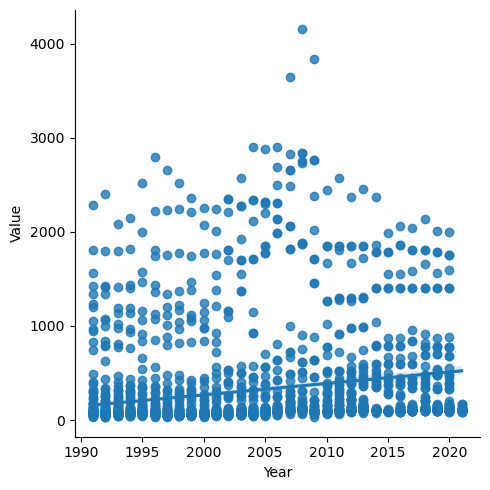

In [56]:
sns.lmplot(x='Year', y='Value', data=df1)

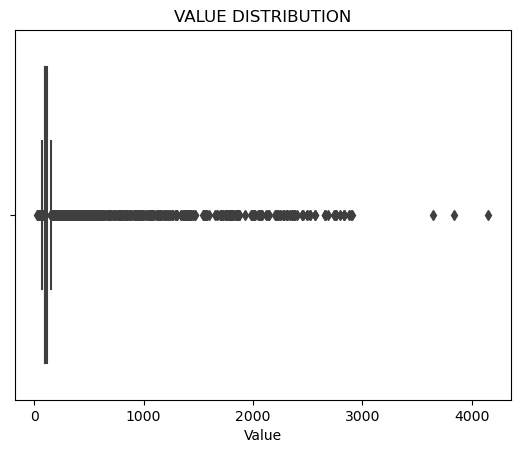

In [57]:
sns.boxplot(x=df1["Value"])
plt.title("VALUE DISTRIBUTION")
plt.show()

In [58]:
df1.head()

,Iso3,Item Code,Item,Element Code,Element,Year,Unit,Value,TotalDifference
0,0,18,1,3,3,1991.0,0,70.44,0
1,0,18,1,3,3,1992.0,0,67.01,1
2,0,18,1,3,3,1993.0,0,67.01,0
3,0,18,1,3,3,1994.0,0,56.54,0
4,0,18,1,3,3,1995.0,0,70.82,0


<AxesSubplot:>

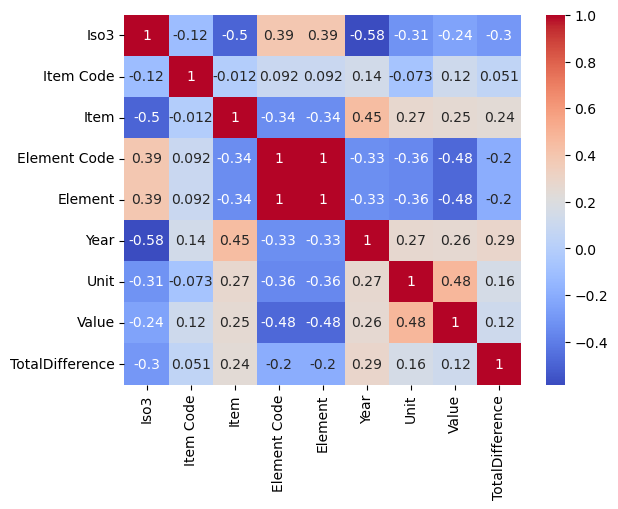

In [59]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

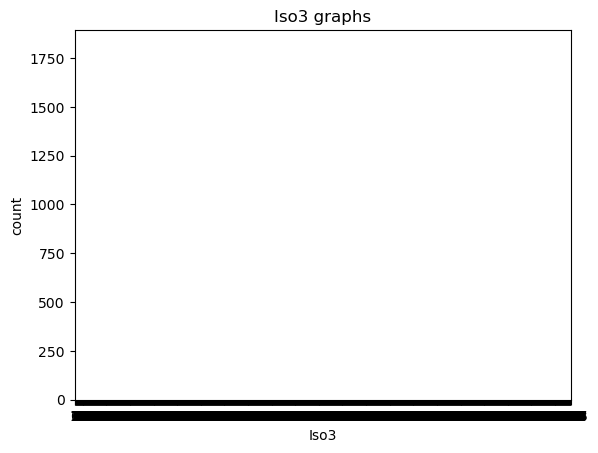

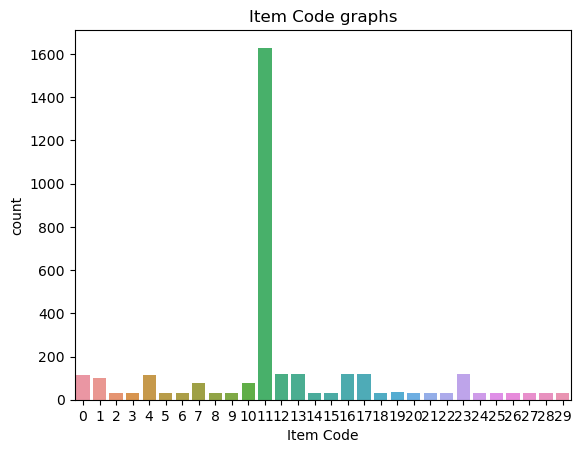

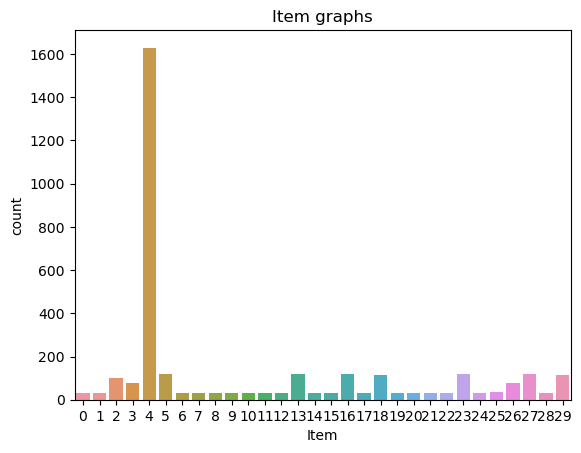

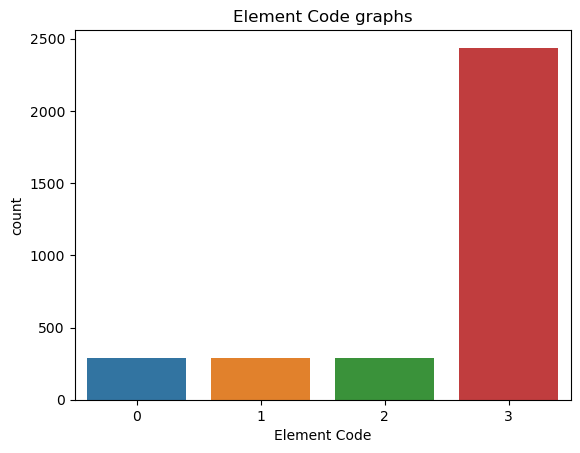

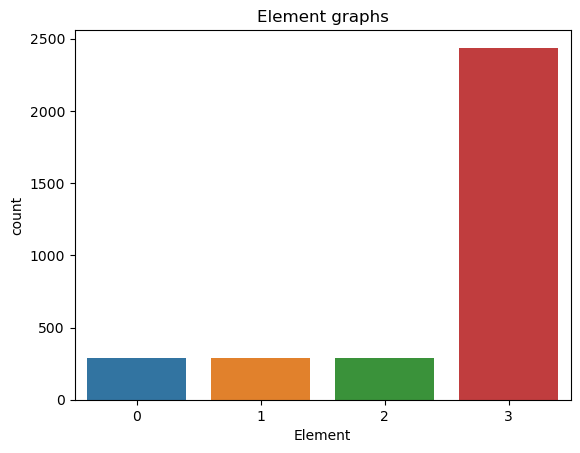

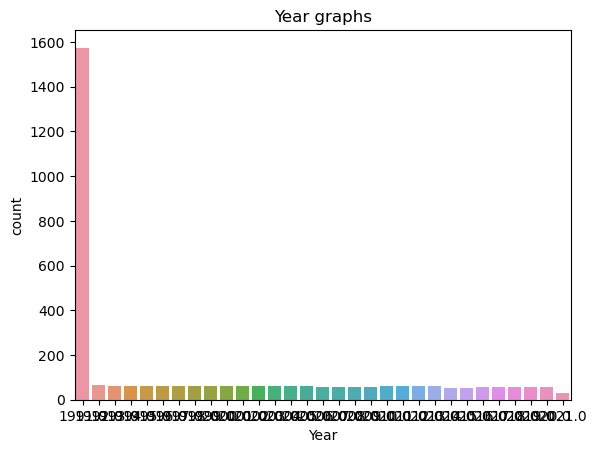

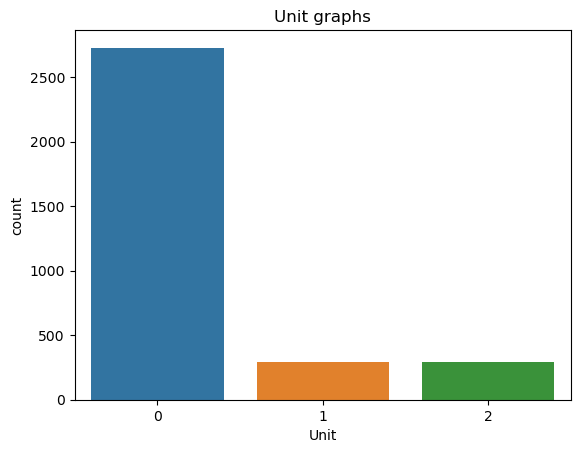

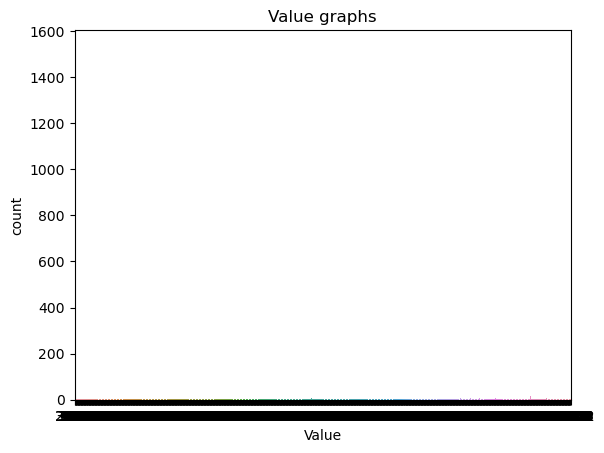

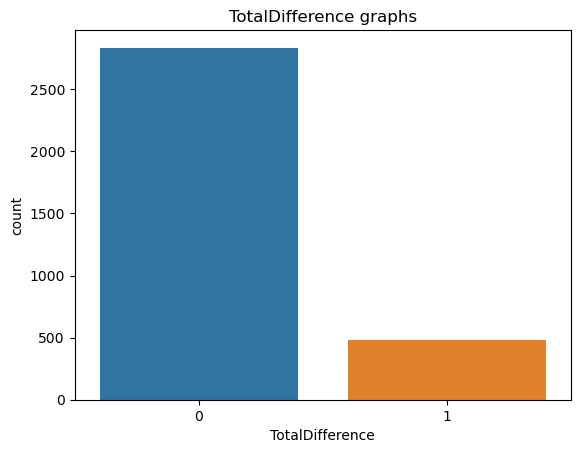

In [60]:
for col in df1.columns:
    sns.countplot(x=col, data=df1)
    plt.title("{} graphs".format(col))
    plt.show()

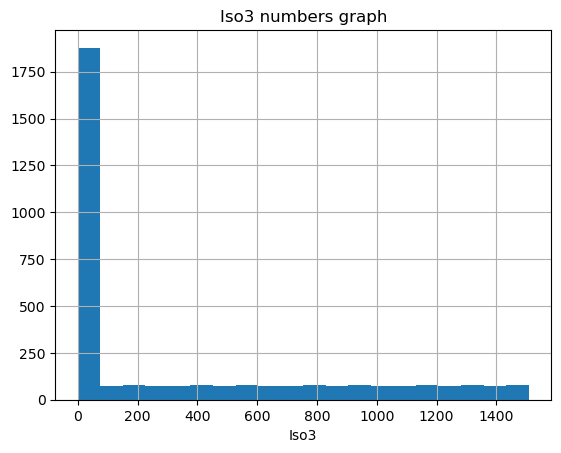

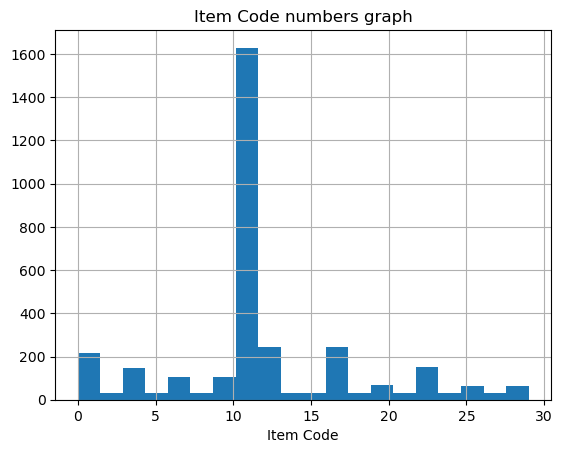

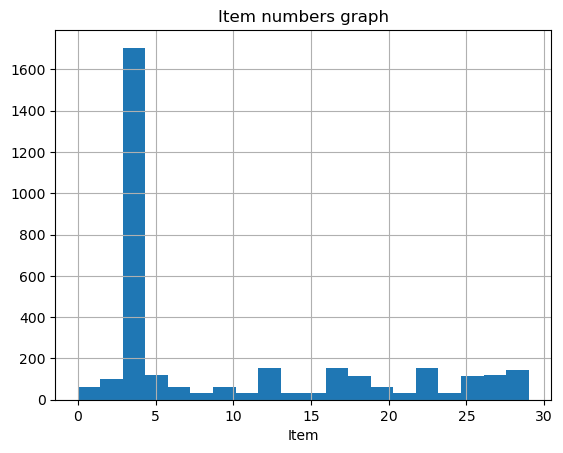

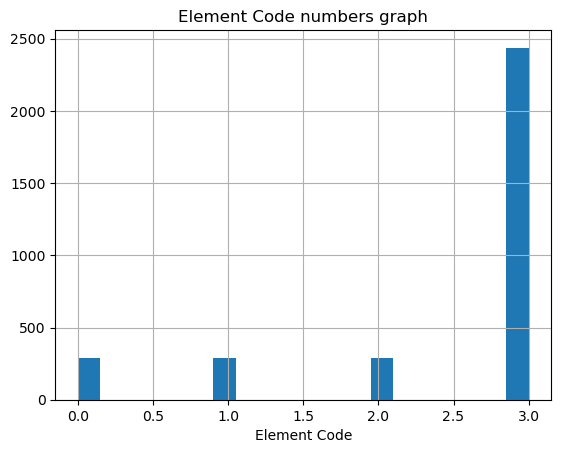

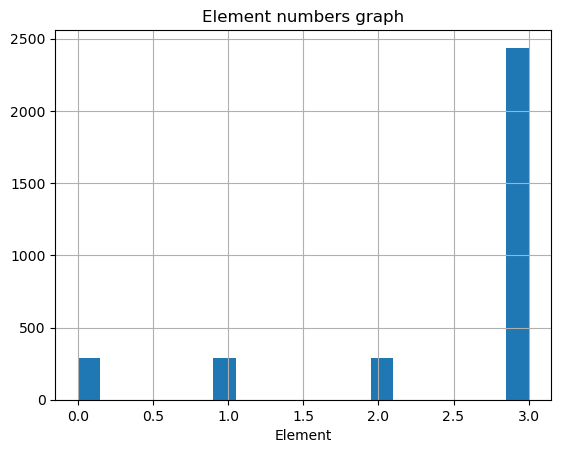

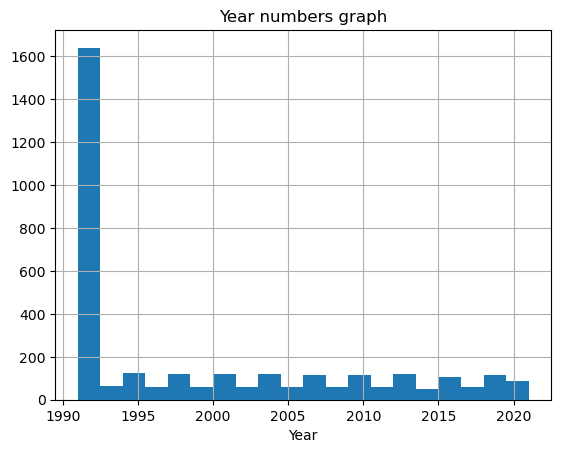

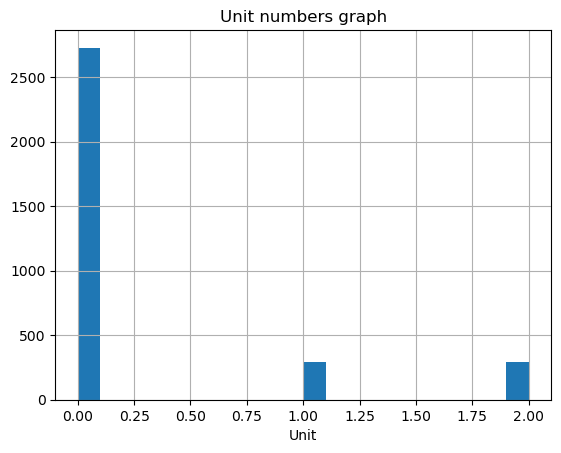

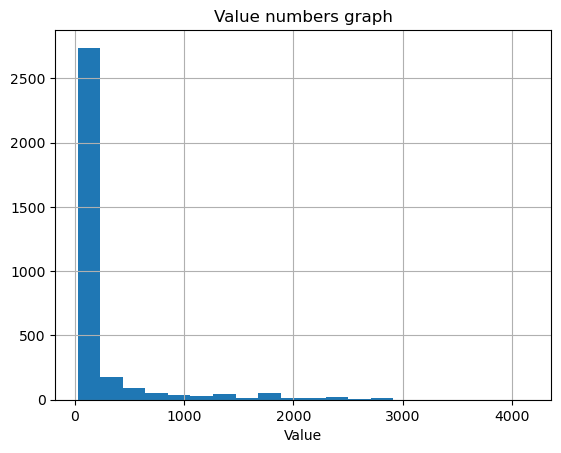

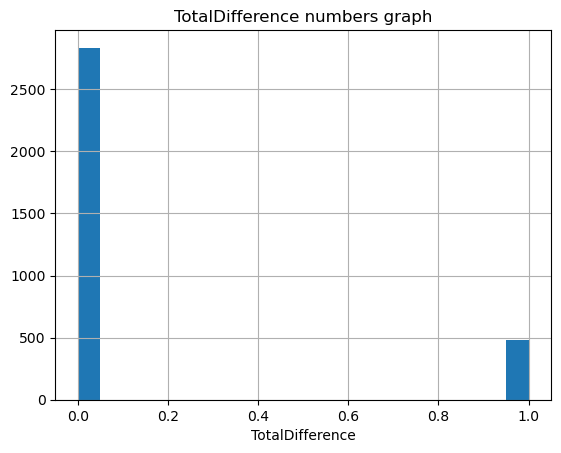

In [61]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.title("{} numbers graph".format(col))
    plt.xlabel(numerical_col)
    plt.show(block=True)

for col in df1.columns:
    plot_numerical_col(df1, col)

# MODELLING

In [62]:
# selecting x, and y and applying standardization
X, y = df1.drop('Value', axis=1), df1.Value
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.72046413,  1.00489049, -1.0337662 , ..., -0.8087023 ,
        -0.43350956, -0.41026009],
       [-0.72046413,  1.00489049, -1.0337662 , ..., -0.70569736,
        -0.43350956,  2.43747816],
       [-0.72046413,  1.00489049, -1.0337662 , ..., -0.60269243,
        -0.43350956, -0.41026009],
       ...,
       [ 2.24200013, -0.1619021 , -0.68764426, ..., -0.8087023 ,
        -0.43350956, -0.41026009],
       [ 2.32795981, -0.1619021 , -0.68764426, ..., -0.8087023 ,
        -0.43350956, -0.41026009],
       [ 2.4139195 , -0.1619021 , -0.68764426, ..., -0.8087023 ,
        -0.43350956, -0.41026009]])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Tree Regression

In [110]:
regressor = DecisionTreeRegressor(random_state=0)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error and r2 score
dmse = mean_squared_error(y_test, y_pred)
dr2 = r2_score(y_test, y_pred)
dtrain_acc = regressor.score(X_train, y_train)
dtest_acc = regressor.score(X_test, y_test)

print("Mean squared error:", dmse)
print("r2 score:", dr2)
print("Train accuracy:", dtrain_acc)
print("Test accuracy:", dtest_acc)

Mean squared error: 3842.921015895372
r2 score: 0.9823815289664839
Train accuracy: 1.0
Test accuracy: 0.9823815289664839


# Decision Tree Regression GridsearchCV

In [111]:
# Define the grid of hyperparameters to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
# Create the decision tree regressor
gregressor = DecisionTreeRegressor()

# Create the grid search object
grid_search = GridSearchCV(gregressor, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print(grid_search.best_params_)
print("Best score:", grid_search.best_score_)


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.9597834704140586


In [112]:
grid_search_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2)
grid_search_reg.fit(X_train, y_train)
y_pred_grid_reg = grid_search_reg.predict(X_test)
# Calculate the mean squared error and r2 score
dgmse = mean_squared_error(y_test, y_pred_grid_reg)
dgr2 = r2_score(y_test, y_pred_grid_reg)
dgtrain_acc = grid_search_reg.score(X_train, y_train)
dgtest_acc = grid_search_reg.score(X_test, y_test)

print("Mean squared error:", dgmse)
print("r2 score:", dgr2)
print("Train accuracy:", dgtrain_acc)
print("Test accuracy:", dgtest_acc)

Mean squared error: 3819.24714738952
r2 score: 0.9824900655106378
Train accuracy: 0.9910947407947962
Test accuracy: 0.9824900655106378


# Linear Regression

In [113]:
# Define the grid of hyperparameters to search over
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi_reg = multi_reg.predict(X_test)
multi_reg_result = r2_score(y_test, y_pred_multi_reg)


# Calculate the mean squared error and r2 score
lmse = mean_squared_error(y_test, y_pred_multi_reg)
lr2 = r2_score(y_test, y_pred_multi_reg)
ltrain_acc = multi_reg.score(X_train, y_train)
ltest_acc = multi_reg.score(X_test, y_test)

print("Mean squared error:", lmse)
print("r2 score:", lr2)
print("Train accuracy:", ltrain_acc)
print("Test accuracy:", ltest_acc)

Mean squared error: 130313.42944652193
r2 score: 0.4025577490442487
Train accuracy: 0.36194299424133536
Test accuracy: 0.4025577490442487


# Linear Regression GridsearchCV

In [114]:
param_grid = {'fit_intercept': [True, False],
              'positive': [True, False]}
grid_search_lr = GridSearchCV(multi_reg, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'fit_intercept': True, 'positive': False}


In [115]:
# Define the grid of hyperparameters to search over
multi_reg_grid = LinearRegression(fit_intercept = True, positive = False)
multi_reg_grid.fit(X_train, y_train)
y_pred_multi_reg_grid = multi_reg_grid.predict(X_test)
multi_reg_result_grid = r2_score(y_test, y_pred_multi_reg_grid)


# Calculate the mean squared error and r2 score
lgmse = mean_squared_error(y_test, y_pred_multi_reg_grid)
lgr2 = r2_score(y_test, y_pred_multi_reg_grid)
lgtrain_acc = multi_reg_grid.score(X_train, y_train)
lgtest_acc = multi_reg_grid.score(X_test, y_test)

print("Mean squared error:", lgmse)
print("r2 score:", lgr2)
print("Train accuracy:", lgtrain_acc)
print("Test accuracy:", lgtest_acc)

Mean squared error: 130313.42944652193
r2 score: 0.4025577490442487
Train accuracy: 0.36194299424133536
Test accuracy: 0.4025577490442487


In [116]:
result_table = pd.DataFrame({"Model":["Decision Tree Regression","Linear Regression"],
                            "MSE":[dmse,lmse],
                            "R2 Score":[dr2,lr2],
                            "Train Accuracy":[dtrain_acc,ltrain_acc],
                            "Test Accuracy":[dtest_acc,dtrain_acc]})
result_table.head()

,Model,MSE,R2 Score,Train Accuracy,Test Accuracy
0,Decision Tree Regression,3842.921016,0.982382,1.000000,0.982382
1,Linear Regression,130313.429447,0.402558,0.361943,1.000000


In [117]:
grid_search_table = result_table = pd.DataFrame({"Model":["Decision Tree Regression","Linear Regression"],
                            "MSE":[dgmse,lgmse],
                            "R2 Score":[dgr2,lgr2],
                            "Train Accuracy":[dgtrain_acc,lgtrain_acc],
                            "Test Accuracy":[dgtest_acc,dgtrain_acc]})
result_table.head()

,Model,MSE,R2 Score,Train Accuracy,Test Accuracy
0,Decision Tree Regression,3819.247147,0.982490,0.991095,0.982490
1,Linear Regression,130313.429447,0.402558,0.361943,0.991095
